<a href="https://colab.research.google.com/github/LucasTARosa/imersao-dados-desafio-final/blob/main/projetoDrugDiscovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Início do projeto

Este projeto teve como objetivo tratar dados advindo de estudos relacionando drogas com espressões gênicas, células e por quais vias os possíveis compostos atuam para realizar as mudanças gênicas. 

Este é meu primeiro projeto de data science, onde poderei trabalhar com os conceitos aprendidos durante a imersão Alura, podendo usar as ferramentas que aprendi para tratar os dados que foram ensinados em aula, mas visto por meus próprios olhos e linhda de racicínio.

Esta imersão foi meu primeiro contato com data science, python, machine learning e tudo que envolve o trabalho de dados através de códigos, portanto, por vezes irei querer realizar algumas comparações, mas infelizmente não conseguirei no momento. Entretanto, irei dar o meu melhor atual para trabalhar com estes dados, espero colher bons frutos.

Resumidamente, separei o tratamento dos dados em três grandes etapas grandes, que serão subdivididas em outras diferentes etapas. A primeira etapa é realizar a importação dos dados e as principais ferramentas que irei utilizar para o tratamento dos dados, criação dos gráficos e também alguns modelos de machine learing que irei aplicar inicialmente. Ainda dentro da primeira etapa, há o entendimento dos dados, entendimento da frequência que eles aparecem e proporções, com a elaboração de diferentes gráficos que podem auxiliar a entender e tomar decisões.

O segundo grande passo é iniciar correlações dos dados e entender como eles podem ser influenciados e em quais condições isso ocorre. O grande objetivo desta etapa é entender como esses dados são correlacionados, para selecionar diferentes pesos para a próxima etapa. Na terceira e última etapa é aplicado modelos de machine learning, tentando entender melhor os dados ao ponto de predizer se possíveis novas drogas irão afetar a espressão genêtica ou não.


Portanto, sem mais delongas, vamos ao projeto!

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
url_dados = 'https://github.com/LucasTARosa/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true'
resultados = pd.read_csv('https://github.com/LucasTARosa/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true')

dados = pd.read_csv(url_dados, compression = 'zip')

In [ ]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Até neste primeiro passo foi realizada a importação das principais ferramentas para tratar os dados e também os próprios dados.

A próxima etapa é realizar o entendimento dos principais dados, suas frequências ou proporções e a exibição em forma de diferentes gráficos.

In [ ]:
dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [ ]:
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [ ]:
dados['tempo'].unique()

array([24, 72, 48])

In [ ]:
dados['tempo'].value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

In [ ]:
dados['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [ ]:
dados['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [ ]:
dados['droga'].nunique()

3289

In [ ]:
dados['droga'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
d778ccd51       1
7b1ac15fc       1
68282e3fb       1
209a68d23       1
98c94f9b9       1
Name: droga, Length: 3289, dtype: int64

In [ ]:
dados['droga'].value_counts()[0:50]

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
d08af5d4b     196
292ab2c28     194
d50f18348     186
d1b47f29d     178
67c879e79      19
52d1e6f43      18
83a9ea167      18
d488d031d      18
a7c2673c1      14
1a52478dc      14
5d9bb0ebe      14
11f66c124      14
6b8b675cc      14
30aa2f709      14
1d3112471      13
8c91d6909      13
f92989f8d      13
5a518a0f0      13
d149a15f5      13
aa7b9f4cc      13
20a3c3f90      13
e0cd5c091      13
10dbb5b2a      13
1d4c91026      13
ab50adc64      13
61155e673      13
02ae89796      13
1d6d22a71      13
3ff075492      13
88c37c66a      13
af12e2904      13
bb3b7c7d5      13
b3031b373      13
a44e72ca3      13
d3ff26fc7      13
0b1ed98a0      13
2f5b9b3bd      13
fd4387eac      13
03b09563c      13
3610da8fc      12
5c68cde71      12
0994324f7      12
b30c11496      12
d632db159      12
754486b37      12
Name: droga, dtype: int64

In [ ]:
dados['droga'].value_counts()[0:10]

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
d08af5d4b     196
292ab2c28     194
d50f18348     186
d1b47f29d     178
67c879e79      19
Name: droga, dtype: int64

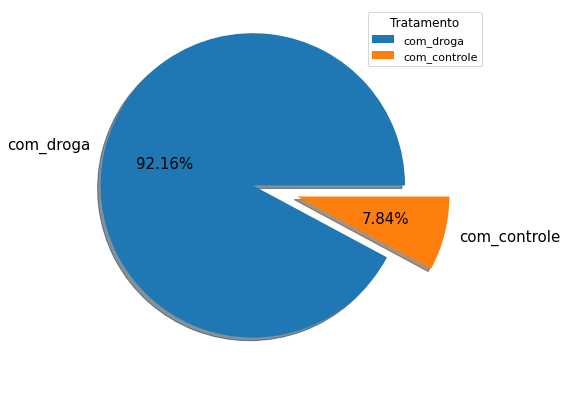

In [ ]:
colunas = ['com_droga','com_controle']
y = np.array(dados['tratamento'].value_counts(normalize=True))
grafico = [0.3,0]

plt.subplots(figsize=(7,7))
plt.pie(y, labels = colunas, explode = grafico, autopct='%1.2f%%', textprops={'fontsize': 15}, shadow = True)
plt.legend(title = 'Tratamento', title_fontsize=12, fontsize = 11,  loc='best')

plt.show()

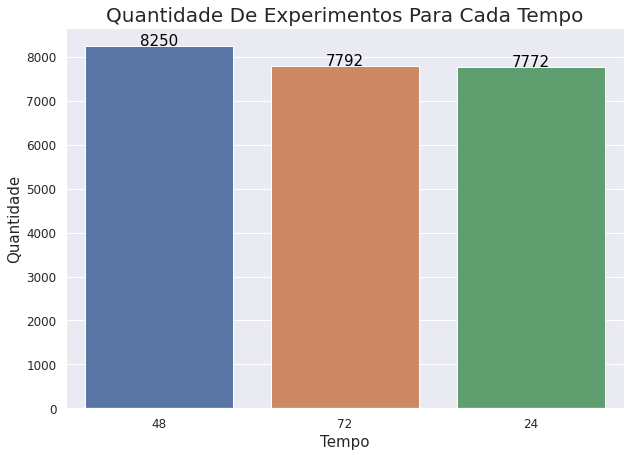

In [211]:
df_tempo = dados.groupby('tempo').size().reset_index(name='quantidade')
df_tempo = df_tempo.sort_values('quantidade', ascending=False,  ignore_index=True)

fig, ax = plt.subplots(figsize=(10, 7)) 
sns.set_style('darkgrid')
sns.barplot(x='tempo', y='quantidade', data=df_tempo, ax=ax, order=df_tempo['tempo'])


plt.title('Quantidade De Experimentos Para Cada Tempo', fontsize=20)
plt.xlabel('Tempo', fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


for index, row in df_tempo.iterrows():
    ax.text(index, row['quantidade'], row['quantidade'], color='black', ha="center", fontsize=15)


plt.show()

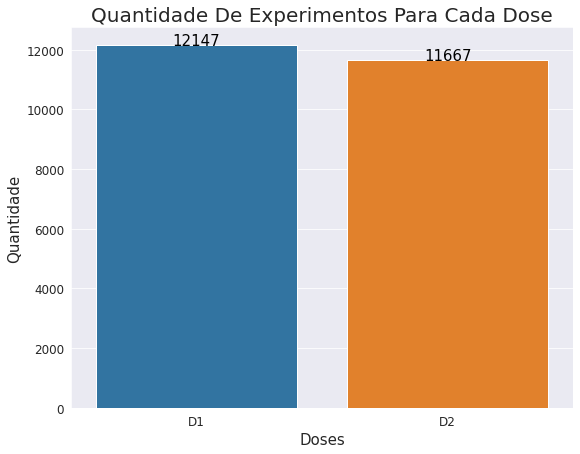

In [ ]:
df_dose = dados.groupby('dose').size().reset_index(name='quantidade')
df_dose = df_dose.sort_values('dose', ascending=True,  ignore_index=True)

fig, ax = plt.subplots(figsize=(9, 7)) 
sns.set_style('darkgrid')
sns.barplot(x='dose', y='quantidade', data=df_dose, ax=ax, order=df_dose['dose'])


plt.title('Quantidade De Experimentos Para Cada Dose', fontsize=20)
plt.xlabel('Doses', fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


for index, row in df_dose.iterrows():
    ax.text(index, row['quantidade'], row['quantidade'], color='black', ha="center", fontsize=15)


plt.show()

Após a finalização desta primeira etapa, foi possível perceber que não há variações significativas entre as quantidades de doses (D1 e D2) e nem entre o tempo de 72h e 24h, com uma ligeira maior quantidade de dados para 48h. Já em relação ao tipo de tratamento, dividido em com_droga e com_controle, foi possível notar uma grande variação no volume de dados.

Em relação ao número de drogas, foi possível perceber que existe uma variação muito grande em sua frequência. Há 1866 experimentos para um único composto, mas a grande maioria se encontra com apenas um experimento. Apesar de existirem 3289 drogas diferentes, as 10 mais frequêntes possuem 4008 experimentos de um total de 23.814. Ou seja, 0,3% das drogas estudadas representam 16,83% de experimentos. (gostaria muito de ter conseguido criar gráficos com essas informações, mas infelizmente não consegui)

Devido a este motivo, a análise de dados será conduzida selecionando apenas os experimentos destas 10 drogas mais frequentes.

#Segunda Etapa
No início da segunda etapa da análise dos dados, será primeiramente feita a limitação dos dados, sendo trabalhados apenas os dados das 10 drogas mais frequentes. Agora é necessario olhar e trabalhar com os dados que representam as expressôes gênicas e a população de células.

De forma resumida, as expressões gênicas são o "fluxo" em que são expressos os genes em uma determinada célula. O estudo associou o aumento ou a diminuição da expressão gênica frente a um determinado composto (e na condição de controle) com o aumento ou diminuição do número de células. Ou seja, se determinado composto aumenta, diminui ou mantêm o "fluxo" em determinada condição e como isto afeta o número de diferentes células.

In [ ]:
dados_drogas10 = dados['droga'].value_counts()[0:10].index
dados_drogas10

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee',
       'd08af5d4b', '292ab2c28', 'd50f18348', 'd1b47f29d', '67c879e79'],
      dtype='object')

In [ ]:
dados_10 = dados.query('droga in @dados_drogas10')
dados_10

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.4860,-2.5790,-6.7470,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.2850,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.6220,0.7204,-2.5930,-4.0630,-0.8282,-3.5000,0.9206,-5.1450,9.8040,-2.6840,-2.4390,-0.1427,...,-10.0000,-9.5910,-10.0000,-10.0000,-8.5110,-10.0000,-10.0000,-10.0000,-10.0000,-8.8870,-10.0000,-10.0000,-10.0000,-10.0000,-4.9020,-9.9840,-5.5520,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.7960,-8.1770,-9.8990,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
39,id_0079d45d3,com_droga,24,D1,292ab2c28,1.6310,-2.1430,-0.0943,-1.1990,0.4869,-0.0935,1.2090,-3.8910,-1.5450,-2.2870,-2.2040,-0.8888,-1.1730,0.0444,-3.9430,0.1673,-0.9502,-1.1750,0.1686,3.8480,-2.9760,-0.0389,1.6330,-0.0655,1.3810,-2.4340,-1.8040,0.3945,-1.2080,-0.1963,-2.0170,0.6004,-2.5860,-1.4550,-0.4141,...,-1.8210,-1.2440,-2.5430,-6.4260,-2.5320,-4.3570,-4.7560,-0.8781,-3.7800,-1.6340,-3.9660,-1.7890,-3.2480,-2.6720,-1.3250,-2.3430,-3.2220,-2.5160,-2.3410,-2.4620,-3.8760,-2.2450,-3.9450,-1.7400,-4.4320,-3.6740,-2.9810,-4.5770,-1.8620,-1.9120,-2.9240,-5.7720,-1.9360,-2.8860,-2.7680,-2.4840,-2.7020,-2.2530,-4.8360,-0.6461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,0.7535,0.5971,1.6350,-0.3146,0.4984,-1.1890,0.3772,-0.8196,0.1083,-2.0350,0.4135,0.7586,-0.4024,-0.

Após a seleção das 10 drogas mais frequentes, gostaria de entender como os demais dados já estudados foram afetados por esta filtragem

In [ ]:
dados_10['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [ ]:
dados_10['tratamento'].value_counts()

com_droga       2142
com_controle    1866
Name: tratamento, dtype: int64

In [ ]:
dados_10['tempo'].unique()

array([48, 24, 72])

In [ ]:
dados_10['tempo'].value_counts()

48    1391
72    1321
24    1296
Name: tempo, dtype: int64

In [ ]:
dados_10['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [ ]:
dados_10['dose'].value_counts()

D1    2047
D2    1961
Name: dose, dtype: int64

Nesta etapa foi possível perceber que não houve grande variação nas divisões de tempo e nem de dose, quando comparado com o volume total de dados. Já em relação ao tratamento, é possível perceber que todos os dados "com_controle" estão contidos entre os 10 primeiros compostos mais frequentes e que é exatamente o mesmo número do composto mais frequente. 

Instigado a verificar se isto é apenas coincidencia ou não, foi realizado a separação do valor mais frequente para investigação se ele representa todo o universo do grupo controle.

In [ ]:
dados_drogas1 = dados['droga'].value_counts()[0:1].index
dados_1 = dados.query('droga in @dados_drogas1')
dados_1.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
47,id_008a986b7,com_controle,48,D2,cacb2b860,0.4860,0.1430,0.5281,-0.0022,-0.2334,-0.6607,0.6459,-0.0109,1.0120,-0.0864,-0.3817,-1.0600,0.9435,0.6296,0.3864,0.1420,0.9834,0.4189,0.7980,-0.2132,0.7651,-1.2410,0.0747,-1.5750,0.1535,-0.0840,0.6705,-0.7517,-0.2756,-1.0920,-0.8683,0.3021,-0.3164,-0.2074,0.4587,...,-0.2189,-0.5262,-0.2982,-0.2491,-0.6373,-1.0040,-0.6726,-0.0321,-0.5398,-0.7518,0.0370,0.7213,-0.3466,0.2354,-0.4432,-0.1020,-0.9391,-1.1970,0.1365,-0.9264,0.5828,-0.7379,-0.4354,0.6077,-0.3771,-0.6525,-0.4169,-1.0640,-0.3331,-0.5761,-0.3085,-0.1866,0.7629,0.3288,-0.9915,-0.3694,-0.4979,0.5281,-0.9245,-0.9367
63,id_009d8340f,com_controle,24,D2,cacb2b860,0.4471,-0.0839,-0.3864,0.3196,0.2584,-0.3156,-0.1187,1.1610,0.5838,-0.2996,-0.3995,1.0700,0.2969,-0.2785,0.9678,-0.1409,1.0850,-0.0656,-0.6502,0.3527,0.1998,0.0975,0.0563,-0.3578,-0.0657,0.5316,0.6573,-0.5355,1.2380,-0.4994,-0.8140,0.2567,-0.8155,1.1180,-0.2501,...,0.2427,0.5214,0.0587,-0.5903,0.1332,-0.3517,-0.3276,-0.4955,0.1359,-0.3010,0.5725,-0.1126,-0.0874,1.2220,-0.0641,0.0246,-0.5659,-0.7402,1.1170,-0.0612,-1.3040,-0.4025,0.3760,-0.0873,0.8064,-0.0170,0.3092,0.2671,0.3311,-0.4572,0.4795,0.3939,0.7665,0.7932,-0.6804,-0.0435,0.0949,0.2000,-0.4326,0.9364


In [ ]:
dados_1['tratamento'].unique()

array(['com_controle'], dtype=object)

In [ ]:
dados_1['tratamento'].value_counts()

com_controle    1866
Name: tratamento, dtype: int64

Neste momento foi constatado que os experimentos rotulados como "droga cacb2b860" são as condições controle do estudo, em diferentes tempos e dosagens. 



## Correlação entre gene e célula
Como forma de realizar um primeiro estudo sobre os dados, será realizada uma correlação entre os primeiros 75 genes e as primeiras 75 células, de forma a conduzir o estudo mais aprofundado em 3 genes. Estes três genes terão correlações distintas, sendo que o primeiro terá uma resposta proporcional em relação a célula, o segundo terá uma baixa correlação e o terceiro será inversamento proporcional.

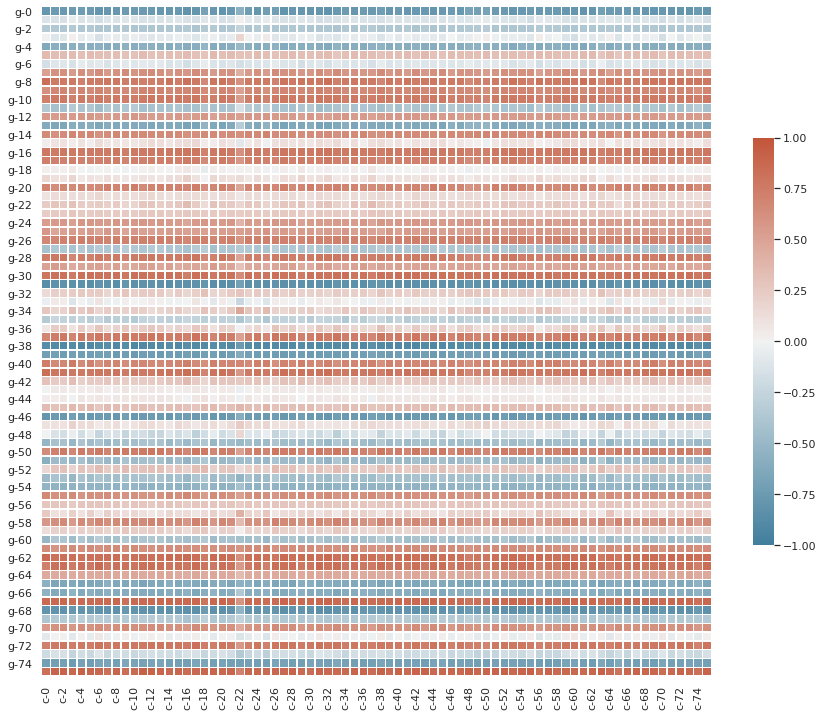

In [ ]:
sns.set()

cols_genes = [f'g-{i}' for i in range(0, 76)]
cols_cel = [f'c-{i}' for i in range(0, 76)]
corr_mat = dados_10[cols_genes+cols_cel].corr().loc[cols_genes,cols_cel]

f, ax = plt.subplots(figsize=(15, 15))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_mat, cmap=cmap, center=0, vmax=1, vmin=-1, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Analisando o gráfico gerado pela correlação entre os genes e as células, os genes que mais se destacaram em relação a correlação proporcional, neutra e inversamente proporcional são os genes 62, 71 e 38, respectivamente.

Portanto, a próxima etapa é realizar um estudo mais detalhado sobre cada um destes genes, entender mudanças entre eles e com uma célula que apresente correlações distintas, como a célula "c-16".

In [ ]:
dados_10['g-62'].describe()

count    4008.000000
mean       -1.241542
std         3.022086
min       -10.000000
25%        -1.489750
50%        -0.359450
75%         0.431550
max         9.912000
Name: g-62, dtype: float64

<function matplotlib.pyplot.show>

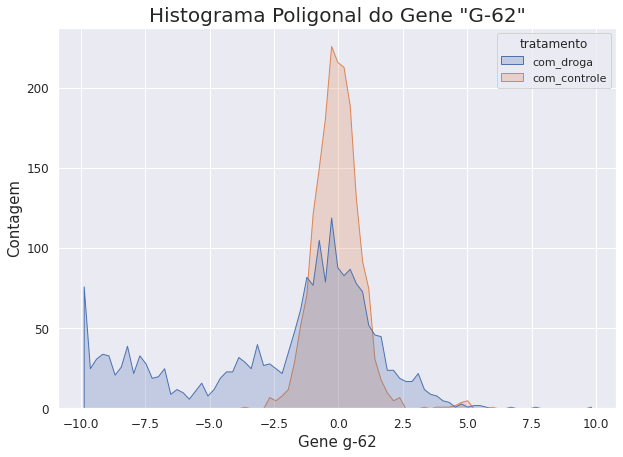

In [218]:
plt.figure(figsize=(10, 7))
sns.histplot(data=dados_10, x='g-62', hue='tratamento', element='poly')

plt.title('Histograma Poligonal do Gene "G-62"', fontsize=20)
plt.xlabel('Gene g-62', fontsize=15)
plt.ylabel('Contagem', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show

In [ ]:
pd.crosstab([dados_10['dose'], dados_10['tempo']], dados_10['tratamento'], values=dados_10['g-62'], aggfunc='count')

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301        350
     48              343        388
     72              307        358
D2   24              305        340
     48              305        355
     72              305        351

In [ ]:
pd.crosstab([dados_10['dose'], dados_10['tempo']], dados_10['tratamento'], values=dados_10['g-62'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.224730  -1.156310
     48        -0.110045  -2.578277
     72        -0.537188  -3.215204
D2   24         0.203986  -1.139284
     48         0.132891  -2.566315
     72        -0.280526  -2.859687

In [ ]:
pd.crosstab([dados_10['dose'], dados_10['tempo']], dados_10['tratamento'], values=dados_10['g-62'], aggfunc='std')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.820046   2.208074
     48         0.838525   3.982045
     72         0.808436   3.860747
D2   24         0.936427   2.328142
     48         0.977703   4.206498
     72         0.905188   4.634351

In [ ]:
pd.crosstab([dados_10['dose'], dados_10['tempo']], dados_10['tratamento'], values=dados_10['g-62'], aggfunc='max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            4.871      3.629
     48            2.409      5.050
     72            4.771      4.244
D2   24            5.000      6.725
     48            5.922      5.173
     72            5.060      9.912

In [ ]:
pd.crosstab([dados_10['dose'], dados_10['tempo']], dados_10['tratamento'], values=dados_10['g-62'], aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.111     -5.583
     48           -3.662    -10.000
     72           -2.586    -10.000
D2   24           -2.634     -7.733
     48           -2.029    -10.000
     72           -2.670    -10.000

<function matplotlib.pyplot.show>

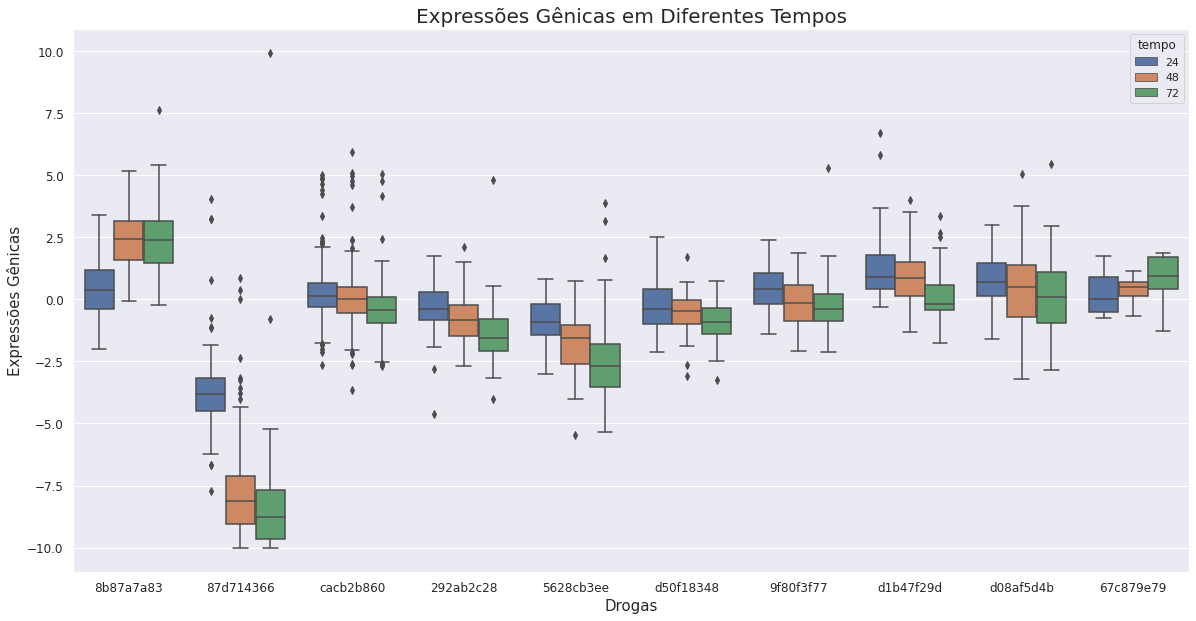

In [221]:
plt.figure(figsize=(20, 10))
sns.boxplot(y='g-62',x='droga', hue='tempo', data=dados_10)
plt.title('Expressões Gênicas em Diferentes Tempos', fontsize=20)
plt.xlabel('Drogas', fontsize=15)
plt.ylabel('Expressões Gênicas', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show

<function matplotlib.pyplot.show>

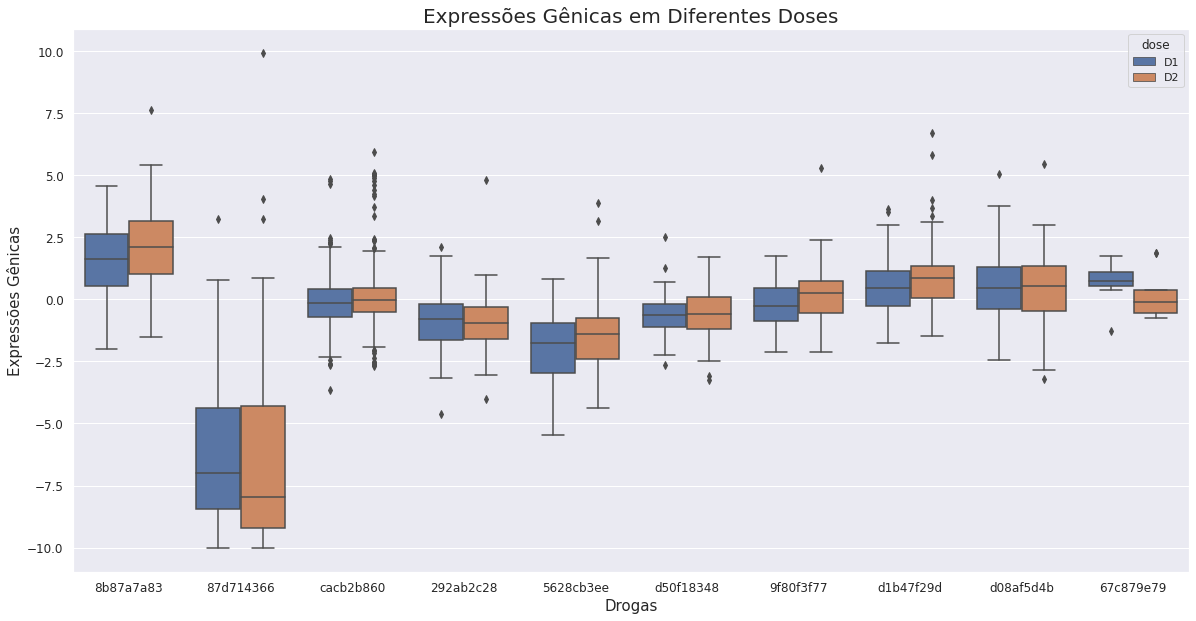

In [222]:
plt.figure(figsize=(20, 10))
sns.boxplot(y='g-62',x='droga', hue='dose', data=dados_10)
plt.title('Expressões Gênicas em Diferentes Doses', fontsize=20)
plt.xlabel('Drogas', fontsize=15)
plt.ylabel('Expressões Gênicas', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show

## Conclusões parciais sobre o gene "g-62"

Após uma análise preliminar sobre o gene "g-62", foi possível constatar algumas informações importantes. A primeira informação relevante é que os valores dos genes estão normalizados entre 10 e -10, especialmente o gene "g-62" possui valores próximos a estes extremos, o que explica o alto desvio padrão em torno da média (sendo a média ligeiramente negativa). 

Com a realização da separação em grupos "com_controle" e "com_droga", foi possível perceber variações significativas da média, com a média bem próxima em zero para o controle (em todas as condições de tempo e dosagem), mas com valores negativos para o grupo "com_droga". Olhando para os valores máximos e mínimos, foi possível perceber que os valores máximos do grupo "com_droga" esteve próximo dos máximos do grupo "com_controle", porém isto não foi observado para os valores mínimos. Foi percebido que, em todas as condições experimentais, os valores mínimos foram mais proeminentes do que no grupo controle, atingindo seu máximo após 48h, nas duas dosagens testadas.

Para entender se este efeito era causado por todos os compostos ou um especial, foi realizada a construção de dois gráficos do tipo "boxplot", em que os dados eram separados por tempo e dose, respectivamente. Os valores médios positivos foram observados em 4 compostos, 5 valores médios negativos e o grupo controle bem próximo a zero. Entre os dez compostos analisados, 9 apresentaram valores médios bem próximos a 0, entretanto, um dos compostos, chamado de "87d714366", teve valores bem diferentes dos demais. Este composto em especial teve expressões gênicas bem negativas, especialmente após 48 e 72 horas, indepente da dosagem. Portanto, por tudo que estudei sobre o assunto até então, este composto diminui severamente a expressão do gene "g-62".

In [ ]:
dados_10['g-71'].describe()

count    4008.000000
mean       -0.312928
std         1.171540
min       -10.000000
25%        -0.864625
50%        -0.169800
75%         0.418400
max         3.541000
Name: g-71, dtype: float64

<function matplotlib.pyplot.show>

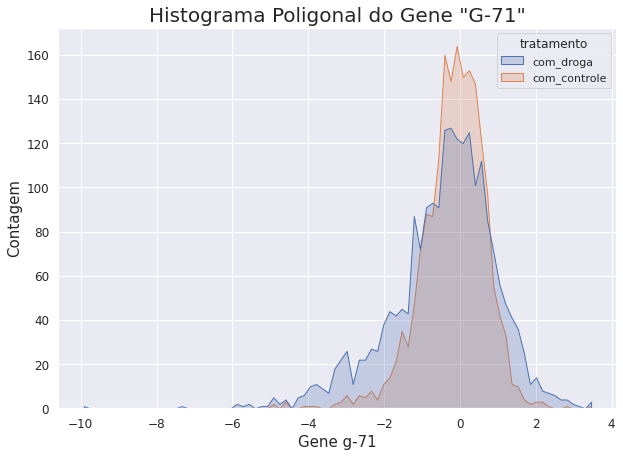

In [220]:
plt.figure(figsize=(10, 7))
sns.histplot(data=dados_10, x='g-71', hue='tratamento', element='poly')

plt.title('Histograma Poligonal do Gene "G-71"', fontsize=20)
plt.xlabel('Gene g-71', fontsize=15)
plt.ylabel('Contagem', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show

In [ ]:
pd.crosstab([dados_10['dose'], dados_10['tempo']], dados_10['tratamento'], values=dados_10['g-71'], aggfunc='count')

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301        350
     48              343        388
     72              307        358
D2   24              305        340
     48              305        355
     72              305        351

In [ ]:
pd.crosstab([dados_10['dose'], dados_10['tempo']], dados_10['tratamento'], values=dados_10['g-71'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.237227  -0.963910
     48        -0.218315  -0.249638
     72         0.067327  -0.102068
D2   24        -0.311645  -0.868191
     48        -0.219521  -0.255595
     72        -0.124928  -0.204555

In [ ]:
pd.crosstab([dados_10['dose'], dados_10['tempo']], dados_10['tratamento'], values=dados_10['g-71'], aggfunc='std')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.784611   1.550972
     48         0.861882   1.186557
     72         0.619404   1.214610
D2   24         0.820844   1.349117
     48         1.043596   1.223363
     72         0.874722   1.491457

In [ ]:
pd.crosstab([dados_10['dose'], dados_10['tempo']], dados_10['tratamento'], values=dados_10['g-71'], aggfunc='max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            1.809      2.322
     48            3.541      2.787
     72            2.114      3.459
D2   24            1.785      2.920
     48            2.844      3.418
     72            1.690      3.211

In [ ]:
pd.crosstab([dados_10['dose'], dados_10['tempo']], dados_10['tratamento'], values=dados_10['g-71'], aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -3.155     -5.288
     48           -4.983     -4.847
     72           -1.896     -3.744
D2   24           -4.567     -5.942
     48           -4.662     -4.937
     72           -5.000    -10.000

<function matplotlib.pyplot.show>

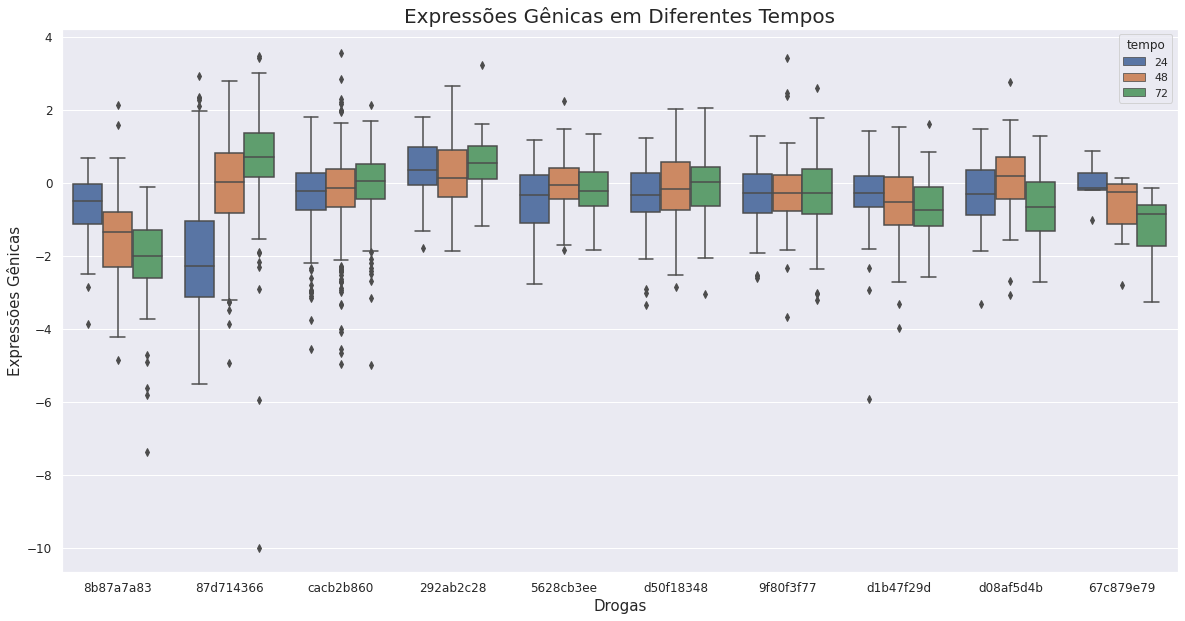

In [223]:
plt.figure(figsize=(20, 10))
sns.boxplot(y='g-71',x='droga', hue='tempo', data=dados_10)
plt.title('Expressões Gênicas em Diferentes Tempos', fontsize=20)
plt.xlabel('Drogas', fontsize=15)
plt.ylabel('Expressões Gênicas', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show

<function matplotlib.pyplot.show>

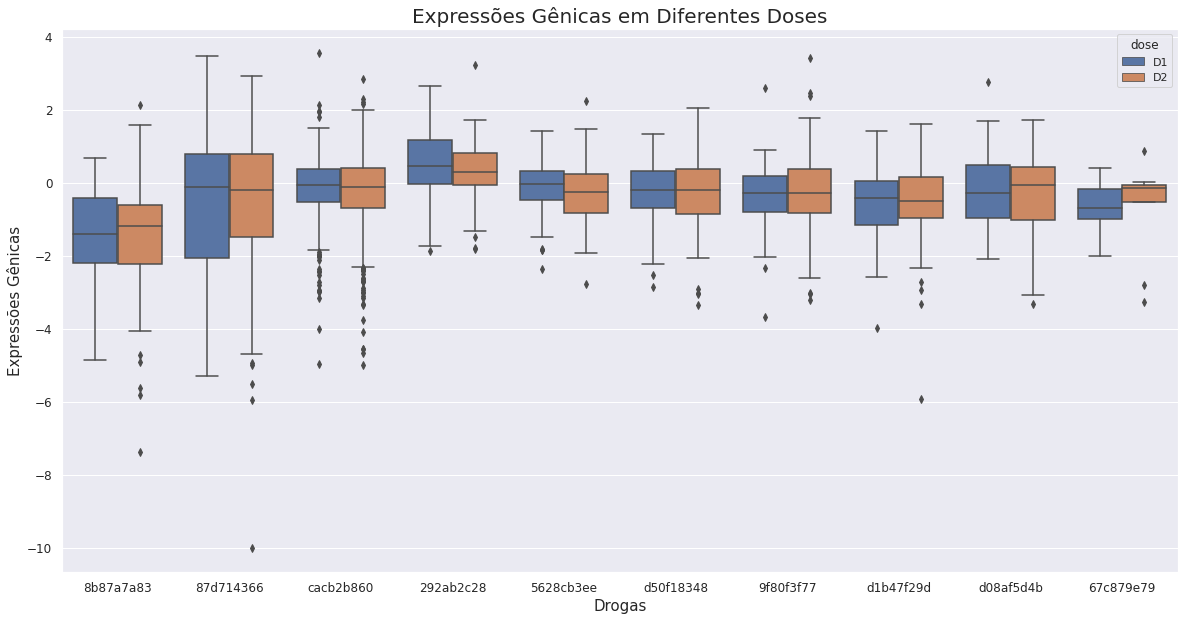

In [224]:
plt.figure(figsize=(20, 10))
sns.boxplot(y='g-71',x='droga', hue='dose', data=dados_10)
plt.title('Expressões Gênicas em Diferentes Doses', fontsize=20)
plt.xlabel('Drogas', fontsize=15)
plt.ylabel('Expressões Gênicas', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show


##Conclusões parciais sobre o gene "g-71"
Diferentemente do gene "g-62", o gene "g-71" esteve sempre próximo dos valores de controle, tanto para a média, desvio padrão e máximo. Para o valor de mínimo, na condição de 72h e dose "D2", houve uma discrepância em comparação ao valor de controle. Para uma investigação mais afundo, também foram construídos os gráficos de "boxsplot" para o gene "g-71".

A análise dos gráficos comprova os valores percebidos nas tabelas, com os valores médios bem próximos a zero, independente do composto. O valor mínimo discrepante ocorreu em apenas uma condição experimental, do mesmo composto que inibia fortemente a expressão gênica do gene "g-62". 

A baixa variação na expressão gênica causada por estes 10 compostos explica porque houve uma baixa correlação entre esse gene e as células, pois como não houve variações significativas no gene, pouco influenciou nas células como um todo. 

In [ ]:
dados_10['g-38'].describe()

count    4008.000000
mean        1.671050
std         3.256063
min       -10.000000
25%        -0.488125
50%         0.271400
75%         2.691250
max        10.000000
Name: g-38, dtype: float64

<function matplotlib.pyplot.show>

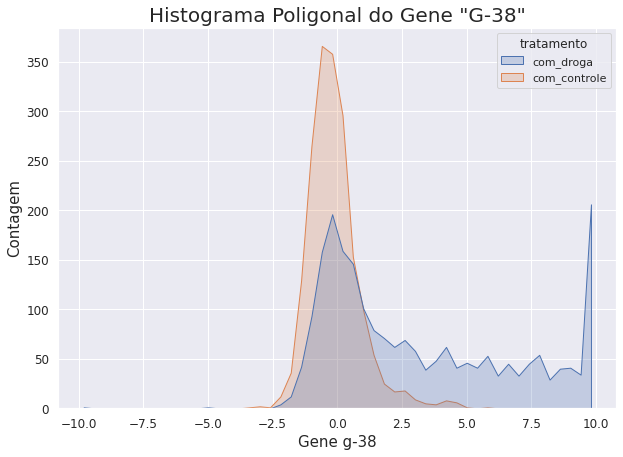

In [227]:
plt.figure(figsize=(10, 7))
sns.histplot(data=dados_10, x='g-38', hue='tratamento', element='poly')

plt.title('Histograma Poligonal do Gene "G-38"', fontsize=20)
plt.xlabel('Gene g-38', fontsize=15)
plt.ylabel('Contagem', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show

In [ ]:
pd.crosstab([dados_10['dose'], dados_10['tempo']], dados_10['tratamento'], values=dados_10['g-38'], aggfunc='count')

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301        350
     48              343        388
     72              307        358
D2   24              305        340
     48              305        355
     72              305        351

In [ ]:
pd.crosstab([dados_10['dose'], dados_10['tempo']], dados_10['tratamento'], values=dados_10['g-38'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.426711   2.350221
     48        -0.392195   3.616500
     72        -0.330939   4.099875
D2   24         0.220027   1.915375
     48         0.097604   3.557721
     72         0.049534   3.824474

In [ ]:
pd.crosstab([dados_10['dose'], dados_10['tempo']], dados_10['tratamento'], values=dados_10['g-38'], aggfunc='std')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.937496   2.777202
     48         0.906241   4.060385
     72         0.921626   4.223460
D2   24         1.009813   2.473325
     48         1.032437   3.718707
     72         1.043533   3.940738

In [ ]:
pd.crosstab([dados_10['dose'], dados_10['tempo']], dados_10['tratamento'], values=dados_10['g-38'], aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -3.320     -1.497
     48           -2.990     -2.217
     72           -2.183     -2.084
D2   24           -2.188     -4.938
     48           -1.768     -2.039
     72           -2.273    -10.000

In [ ]:
pd.crosstab([dados_10['dose'], dados_10['tempo']], dados_10['tratamento'], values=dados_10['g-38'], aggfunc='max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            4.313     10.000
     48            5.886     10.000
     72            4.464     10.000
D2   24            4.081      9.867
     48            4.703     10.000
     72            5.028     10.000

<function matplotlib.pyplot.show>

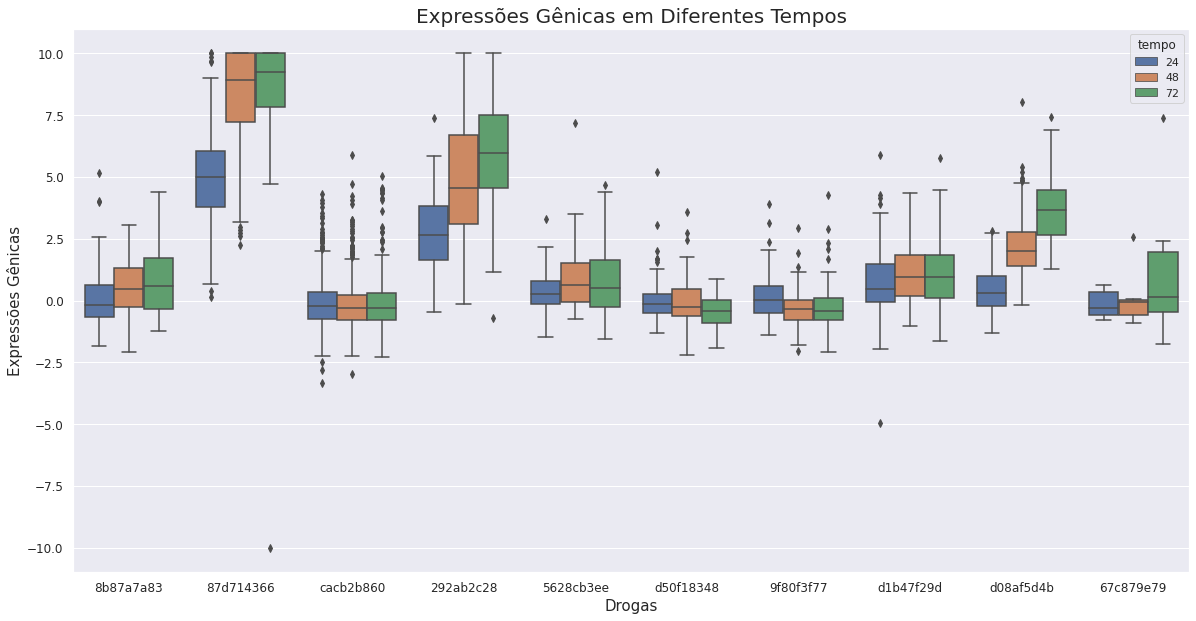

In [225]:
plt.figure(figsize=(20, 10))
sns.boxplot(y='g-38',x='droga', hue='tempo', data=dados_10)
plt.title('Expressões Gênicas em Diferentes Tempos', fontsize=20)
plt.xlabel('Drogas', fontsize=15)
plt.ylabel('Expressões Gênicas', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show

<function matplotlib.pyplot.show>

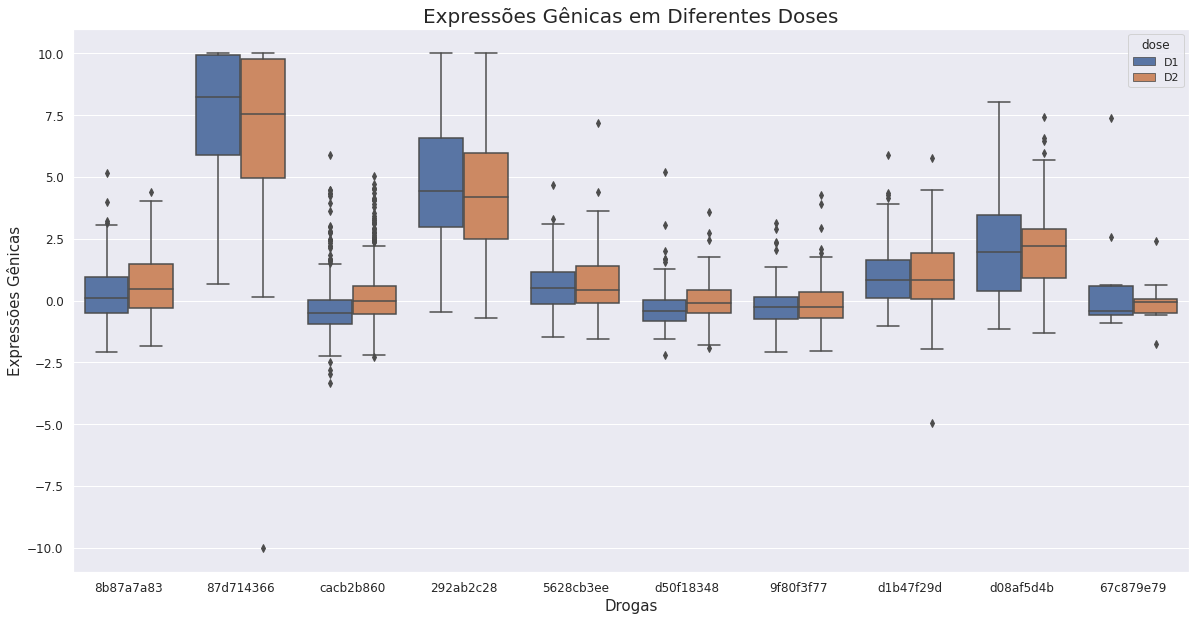

In [226]:
plt.figure(figsize=(20, 10))
sns.boxplot(y='g-38',x='droga', hue='dose', data=dados_10)
plt.title('Expressões Gênicas em Diferentes Doses', fontsize=20)
plt.xlabel('Drogas', fontsize=15)
plt.ylabel('Expressões Gênicas', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show

##Conclusões parciais sobre o gene "g-38"

O gene "g-38" se assemelhou muito ao gene "g-62", porém inversamente em relação aos valores negativos e positivos. A média dos valores do grupo "com_droga", em todas as condições de tempos e doses, foi significativamente mais positiva do que o grupo "com_controle", assim como um maior desvio padrão. Ao analisar os valores mínimos e máximos, foi possível perceber que em apenas uma condição ocorria o maior valor mínimo possível (-10), sendo necessária uma investigação mais aprofundada sobre isto. Em relação aos valores máximos, em apenas uma condição (D1, 24h) não ocorreu o valor máximo possível (10), ainda assim foi significativamente maior do que o grupo controle.

Para uma investigação mais aprofundada sobre quais compostos estavam causando este aumento na expressão gênica, foram criados novamente gráficos do tipo "boxsplot", obtendo as seguintes informações: 7 compostos variaram seus valores em torno do grupo controle (composto cacb2b860). Entretanto, dois compostos tiveram valores discrepantes do restante. O composto "292ab2c28" teve valores acima dos demais, tendo média próxima a 5. Porém, o composto "82d714366", o mesmo que diminuiu fortemente a expressão gênica do gene "g-62", por sua vez, aumentou muito a expressão gênica do gene "g-38", tendo médias acima de 5 para o tempo de 24 horas, 7,5 para as doses "D1" e "D2". Para os tempos de 48 e 72 horas, as médias estiveram próximas do valor máximo, em ambas as dosagens.

##Próximo passo

O próximo passo para continuar a estudar sobre estes genes é relacioná-los de forma mais direta, assim como também dar início na correlação entre os genes e a célula "c-16", escolhida por ser uma célula com variações significativas em relação a estes três genes estudados até o momento.


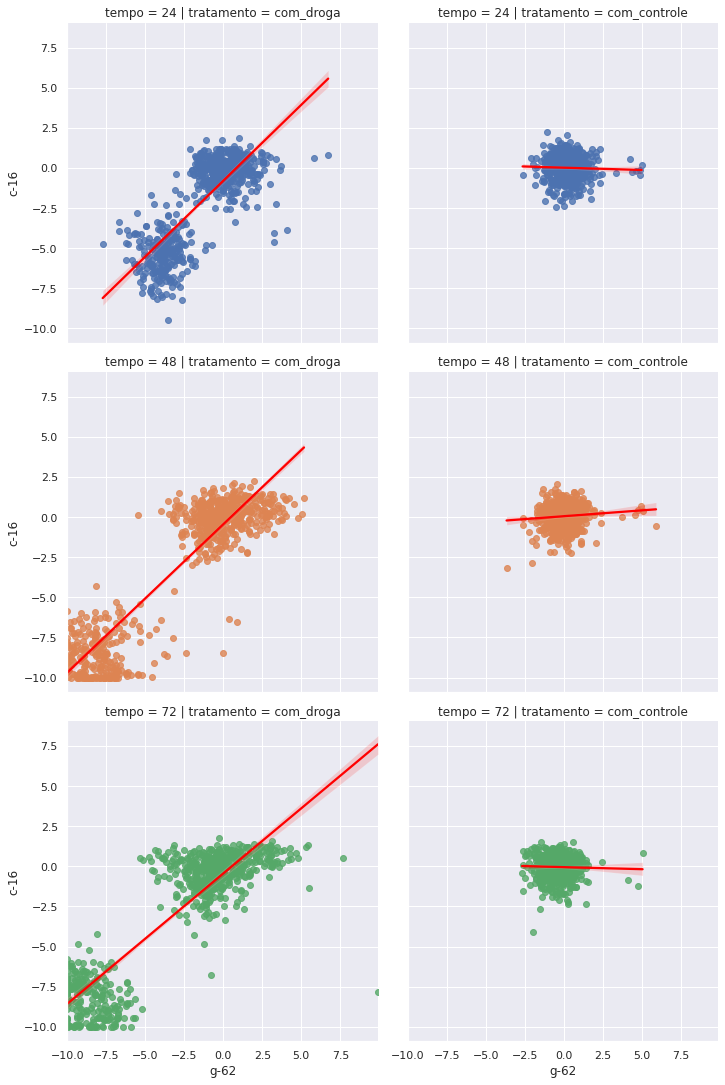

In [233]:
sns.lmplot(data=dados_10, y = 'c-16', x = 'g-62',hue='tempo',line_kws={'color':'red'},col='tratamento',row='tempo')

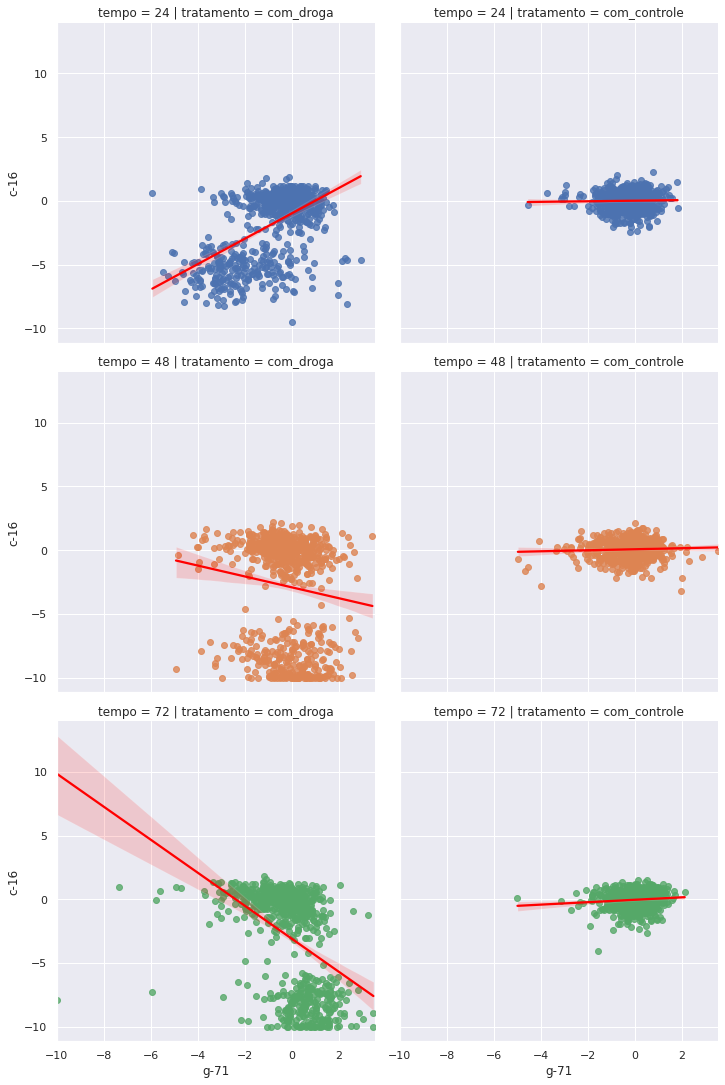

In [ ]:
sns.lmplot(data=dados_10, y = 'c-16', x = 'g-71',hue='tempo',line_kws={'color':'red'},col='tratamento',row='tempo')

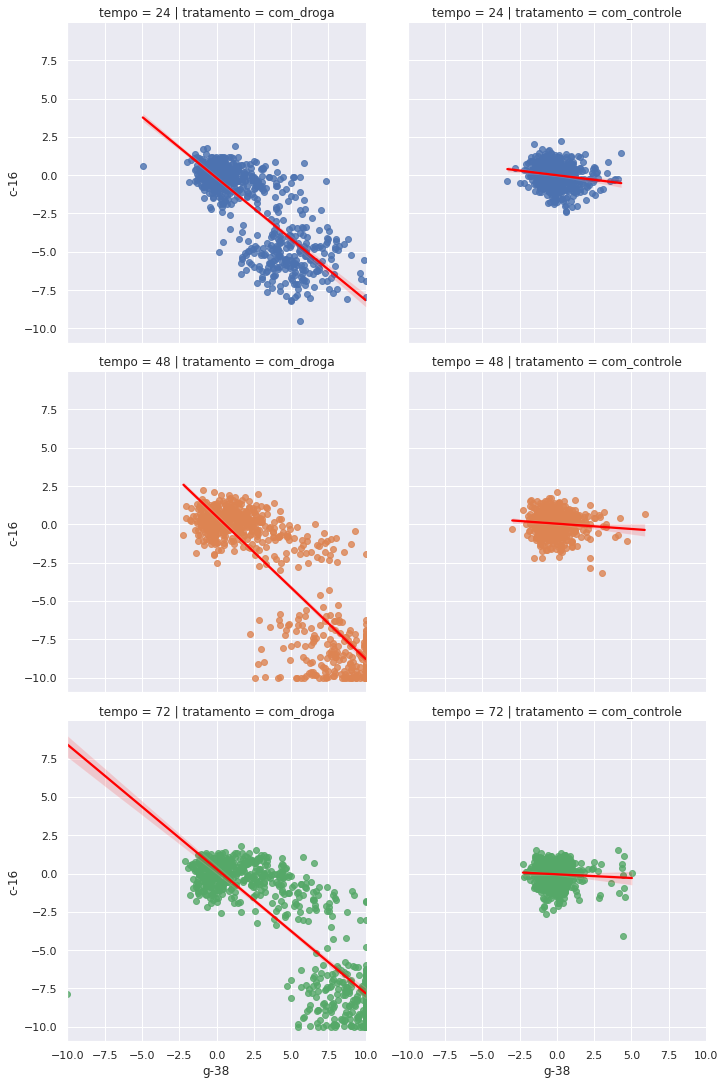

In [ ]:
sns.lmplot(data=dados_10, y = 'c-16', x = 'g-38',hue='tempo',line_kws={'color':'red'},col='tratamento',row='tempo')

## Conclusões parciais após o correlacionamento entre os genes "g-62", "g-71" e "g-38" com a célula "c-16"

Após este novo passo, foi possível perceber uma grande diminuição no número de células "c-16" a medida em que o gene "g-62" diminuia a sua expressão gênica, porém, para o gene "g-38" ocorreu de forma inversa, onde o número de células "c-16" diminuia a medida em que se aumentava a expressão gênica do mesmo. Para o gene "g-71" houveram casos de baixa quantidade de células "c-16" mesmo com uma baixa variação na expressão gênica. Ao passo que o grupo controle manteve o praticamente o mesmo número de células e baixa variação na expressão dos genes, sendo um controle ideal para comparar se os efeitos eram advindos da manipulação durante o experimento, ou pelo composto utilizado.

Portanto, como foi constatado anteriormente, o composto "87d714366" é o que promove maior variação na expressão gênica para os genes "g-62" e "g-38", sendo assim, estes mesmos gráficos foram refeitos levando em consideração apenas este composto e comparando com o grupo controle. 

In [ ]:
dados_drogas2 = dados['droga'].value_counts()[0:2].index
dados_2 = dados.query('droga in @dados_drogas2')
dados_2['droga'].unique()

array(['87d714366', 'cacb2b860'], dtype=object)

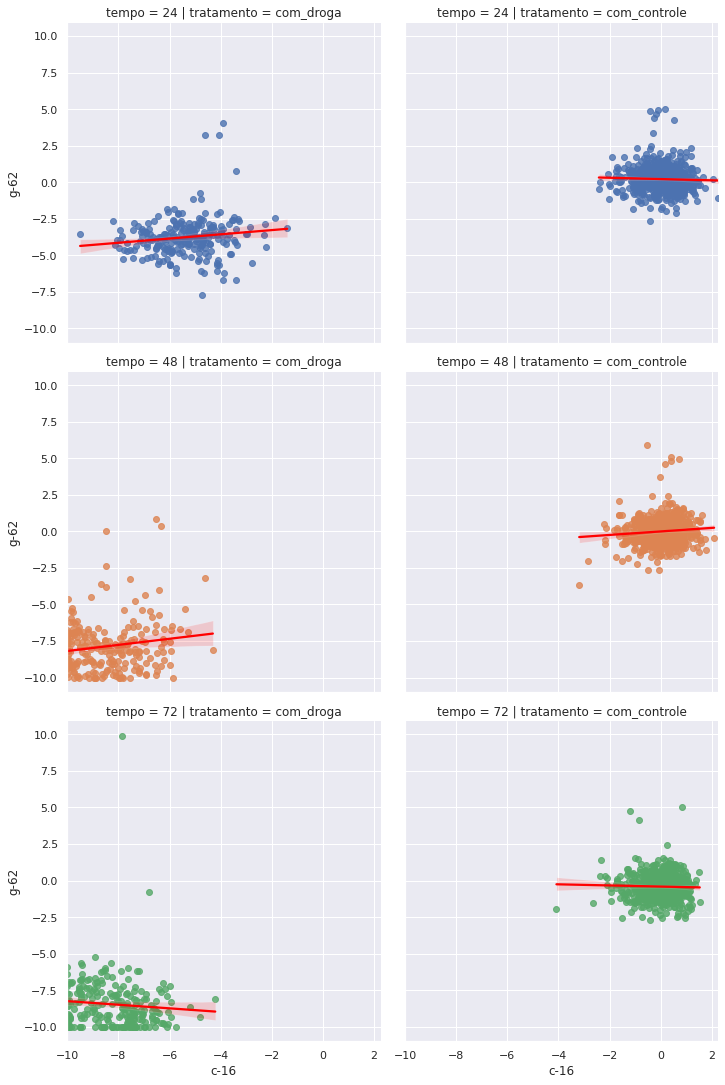

In [ ]:
sns.lmplot(data=dados_2, y = 'c-16', x = 'g-62',hue='tempo',line_kws={'color':'red'},col='tratamento',row='tempo')

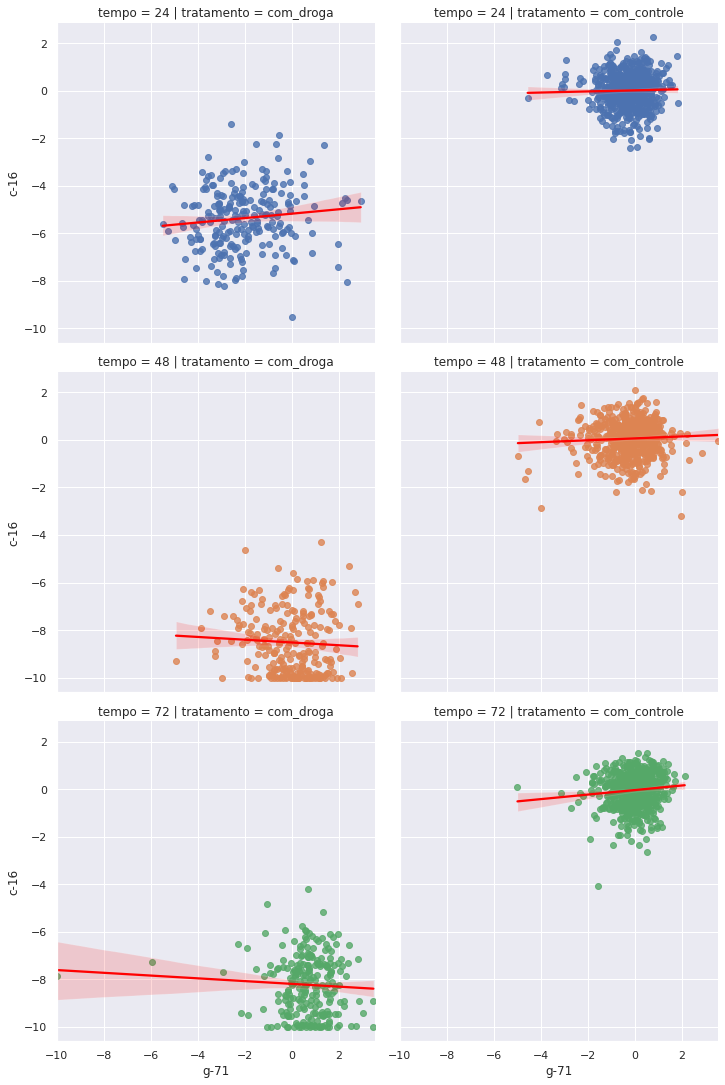

In [ ]:
sns.lmplot(data=dados_2, y = 'c-16', x = 'g-71',hue='tempo',line_kws={'color':'red'},col='tratamento',row='tempo')

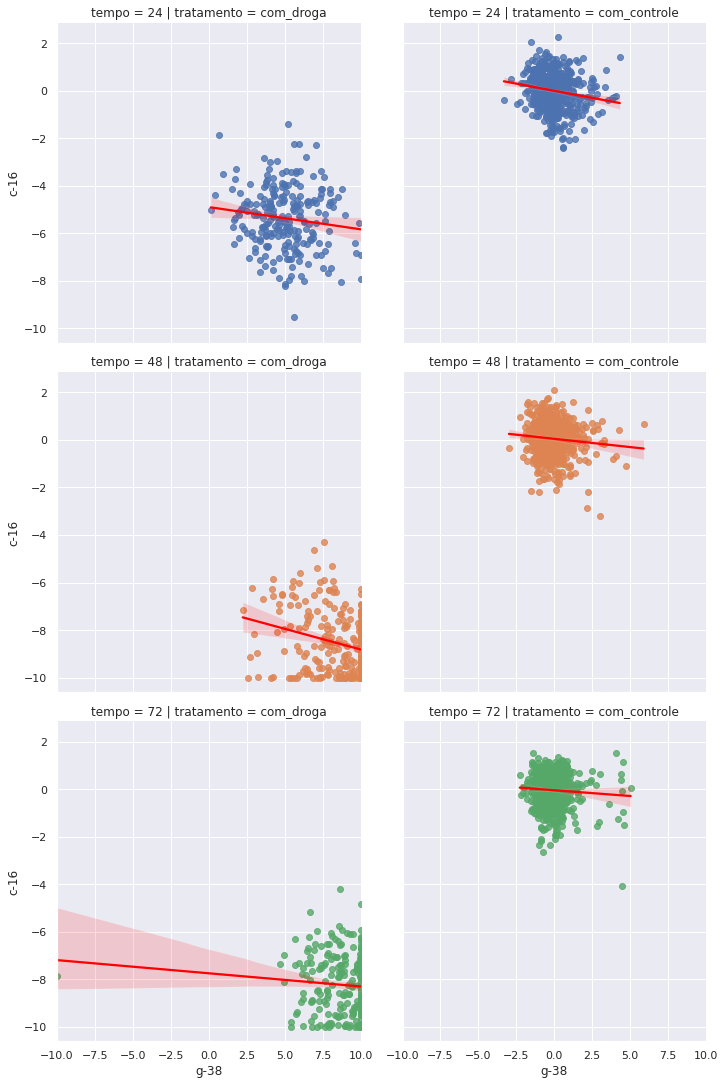

In [ ]:
sns.lmplot(data=dados_2, y = 'c-16', x = 'g-38',hue='tempo',line_kws={'color':'red'},col='tratamento',row='tempo')

## Conclusões parciais após este passo

Foi comprovado que o composto "87d714366" é o responsável por realizar tanto as alterações gênicas, quanto as alterações gênicas que causaram grande diminuição no número de células "c-16". Além disto, devido as alterações nos genes "g-62" e "g-38" serem inversas, ou seja, o composto "87d714366" aumentar a expressão gênica do gene "g-38" e diminuir a expressão gênica do gene "g-62", é possível presumir que este composto atua por duas vias diferentes, mas que ambas levam  a diminuição no número de células "c-16". Este efeito é observado a medida que o tempo decorre, com resultados mais significativos para o tempo de 48 e 72 horas, em comparação ao tempo de 24 horas.

## Conclusões após a etapa 2
Ao final desta etapa, foi possível identificar um composto que é capaz de realizar mudanças significativas concomitantemente em dois genes diferentes, ora aumentando a expressão gênica, ora diminuindo. Porém, ambas as mudanças convergem para um mesmo resultado: a diminuição no número de células "c-16". 

#Etapa 3

Nesta etapa será trabalhado o conjunto de dados denominado "resultados", onde exibe se um determinado experimento proporcionou ou não alguma atividade, além da via em que isso ocorreu. 

Após esta subetapa com os dados da tabela resultados, voltaremos a trabalhar com todos os dados experimentais, onde será realizada a tentativa de obter um modelo de machine learning que tentará prever se determinado composto altera a expressão gênica através de algum tipo de mecanismo estudado. 

Isto é possível pois os dados chamados resultados fornecem atividade ou não de determinada via, em todas as condições experimentais. Sendo assim, é possível entender quais são as condições necessárias para ter, ao menos, uma mudança na expressão gênica. 

In [ ]:
resultados['n_moa'] = resultados.drop('id', axis = 1).sum(axis = 1)
resultados['ativo_moa'] = (resultados['n_moa'] != 0)
resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


In [ ]:
dados_combinados = pd.merge(dados, resultados[['id','n_moa', 'ativo_moa']], on='id')
dados_combinados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [ ]:
dados_combinados_numeros = pd.get_dummies(dados_combinados['tratamento'])
dados_combinados_numeros = pd.get_dummies(dados_combinados, columns = ['tratamento', 'dose', 'tempo'])
dados_combinados_numeros = dados_combinados_numeros.drop(['n_moa'], axis = 1)
dados_combinados_numeros.head()


,id,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,...,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,ativo_moa,tratamento_com_controle,tratamento_com_droga,dose_D1,dose_D2,tempo_24,tempo_48,tempo_72
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,...,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,True,0,1,1,0,1,0,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,...,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,False,0,1,1,0,0,0,1
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,...,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,True,0,1,1,0,0,1,0
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,...,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,False,0,1,1,0,0,1,0
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,...,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,True,0,1,0,1,0,0,1


##Fim da subetapa

Ao final desta subetapa foi realizada a construção de novas colunas ao final dos dados que contêm os genes e as células. A primeira coluna, nomeada de "n_moa" realiza a soma de todos os mecanismos que foram ativados durante aquele determinado experimento. A coluna "ativo_moa" retornou um valor booleano, ou seja, verdadeiro ou falso, para a presença de atividade ou não. Na segunda etapa desta subetapa, foi realizada a transformação dos dados de tratamento, tempo e dose em valores de 0 e 1 (semelhante ao booleando, mas em uma variavel do tipo int). 

Essa transformação se justifica para que os modelos de machine learning estudandos neste projeto possam levar em consideração estas variáveis em suas modelagens, uma vez que será considerado apenas valores que são números. Como objetivo do desenvolvimento do modelo de machine learning é de entender se houve ou não algum tipo de atividade, sem levar em consideração quantas atividades (moa) tiveram, a coluna "n_moa" será retirada dos dados a serem utilizados

In [ ]:
#1 Simulação para retornar o "ativo_moa_False", ou seja, para não ter resposta MOA
x = dados_combinados_numeros.select_dtypes('float64')
y = dados_combinados_numeros['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 7439)

modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.6336342641192526

In [ ]:
#2 Teste simples, assumindo que todos os valores estão corretos
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.6034012177199244

## Final desta subetapa

Nesta etapa de simulação, o modelo de machine learning pôde utilizar todos os dados disponíveis, já que até mesmo os dados das condições em que o experimento ocorreram foram transformados em números. Foi utilizado o modelo de regressão linear para a simulação 1, afim de tentar obter um modelo que se ajustasse ao retornar se algum moa foi ativo ou não. Em um universo onde 20% dos dados foram reservados para testar o modelo e em uma condição randômica (condição necessária para poder realizar a comparação com outras modelagens, uma vez que sempre será utilizado os mesmos valores para teste e treino, porém selecionados de forma randômica), o score para esta simulação foi de 63,36%. Em comparação com a simulação realizada por um teste do tipo "dummy" (simulação 2), que assumia que todos os valores seriam positivos, a simulação 1 teve cerca de 3% a mais de acerto, já que o teste "dummy" obteve resultado de 60,34%. 

Devido a baixa diferença do modelo de regressão linear para o modelo dummy, é necessário explorar outras modelagens de machine learning. Assim sendo, outros modelos serão aplicados, como o modelo de árvore e também de deepforest.

In [ ]:
x = dados_combinados_numeros.select_dtypes('float64')
y = dados_combinados_numeros['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 7439)

teste = []
treino = []
for i in range(1, 50):
  modelo_arvore = DecisionTreeClassifier(max_depth = i)
  modelo_arvore.fit(x_treino, y_treino)
  teste.append(modelo_arvore.score(x_teste, y_teste))
  treino.append(modelo_arvore.score(x_treino, y_treino))

<function matplotlib.pyplot.show>

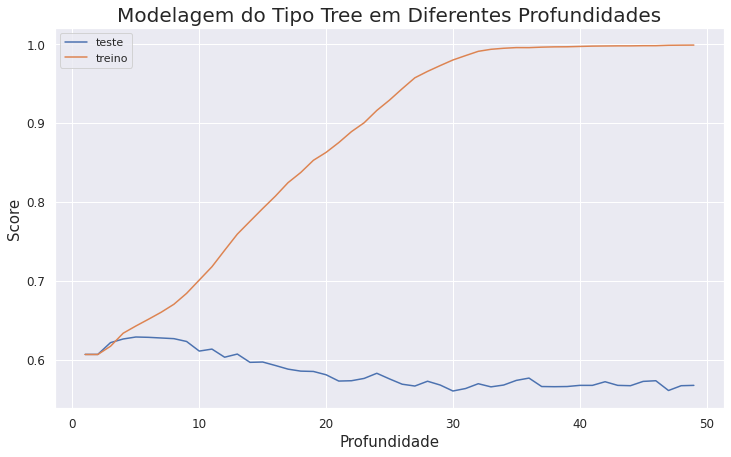

In [237]:
plt.figure(figsize=(12, 7))
sns.lineplot(x = range(1, 50), y = teste, label='teste')
sns.lineplot(x = range(1, 50), y = treino, label='treino')
plt.title('Modelagem do Tipo Tree em Diferentes Profundidades', fontsize=20)
plt.xlabel('Profundidade', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show

In [ ]:
x = dados_combinados_numeros.drop(['id', 'droga'], axis=1)
y = dados_combinados_numeros['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 7439)

modelo_randomForest = RandomForestClassifier()
modelo_randomForest.fit(x_treino, y_treino)
modelo_randomForest.score(x_teste, y_teste)

0.9968507243334033

##Conclusão desta etapa
A utilização pelo modelo de árvore retorna valores inferiores ao modelo de regressão linear a partir da profundidade = 4. A partir deste ponto, quanto mais o modelo conhece os dados de treino e ajusta a modelagem, pior fica ao tratar dados nunca visto (os dados teste). A partir da profundidade = 35, o ajuste para os dados de treino tendem a 1, porém ao aplicar em dados desconhecidos cai para abaixo de 0,6 (60%), o que não é um ajuste ideal. Este efeito é conhecido como overfit, quando o modelo se torna tão bom em acertar os dados de treino, mas se torna pior com dados desconhecidos.

Entretanto, ao realizar a modelo de deepforest, com todos os dados iguais ao fornecido para os demais modelos, buscando um modelo que pudesse prever se um MOA seria ativo ou não, o ajuste foi de 0,9969, ou 99,69%. Este ajuste se torna ideal para estimar se determinado composto, em determinada condição, possui atividade ou não.

# Conclusão do projeto
A primeira e maior conclusão é de que foi encontrado um modelo de machine learning que retorna, com 99,69% de certeza, se uma droga é ativa ou não. As demais conclusões se dão que um mesmo composto pode atuar em mais de um gene de forma inversa, ou seja, em um determinado gene pode aumentar sua expressão, mas em outro gene o efeito é a diminuição da expressão gênica. Entretanto, mesmo que as expressões gênicas aumentem para um gene e diminua em outro, ambos os resultados convergem para a diminuição do número de determinada célula.  

Gostaria de agradecer imensamente a Alura, aos professores envolvidos, a Vanessa e a comunidade. Sem algum de vocês eu não teria realizado o meu primeiro projeto na área de data science. Gostaria de ter experiência suficiente para fazer mais coisas que eu queria e explorar outras variáveis, mas dei o melhor que eu posso hoje. Adorei toda a experiência e quero mergulhar de cabeça na área de data science, melhorando e aprendendo cada vez mais. Um grande obrigado a todos!